In [4]:
import numpy as np
np.random.seed(2024 - 4 - 16)
import matplotlib.pyplot as plt

In [1]:
# the choice of learning rate alpha will have a big impact on the efficiency and accuracy of a training process
# and poorly chosen alpha may lead to a model not working at all!

In [2]:
# for the sake of simplicity, let's consider a cost function taht uses only weight term without a bias part,
# f(w) =>

# $w = w - \alpha \times \frac{\mathrm{d}}{\mathrm{dw}}f(w)$

In [3]:
# the alpha here is the learning rate.
# let's see what will happen if the learning rate alpha is too small or too large!

In [82]:
# let's simulate a y = x * 1.876425 model (non-linear)
M = 1.876425
x = np.arange(start = -100, stop = 100, step = 0.10)
y =  M * x + np.random.normal(loc = 0.0, scale = 2, size = x.size)  # introducing some random noise

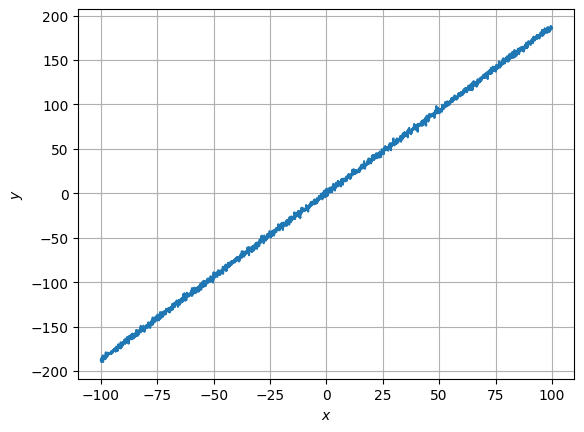

In [83]:
fig, axes = plt.subplots()
axes.plot(x, y)
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

In [84]:
# let's define our cost function

cost_fn = lambda target, m, x : np.square((m * x) - target).sum() / (2 * target.size)

In [85]:
cost_fn(y, M, x)

1.9855088436377875

In [177]:
# costs

wcandidates = np.linspace(start = 1, stop = 2.5, num = x.size)
errs = np.array([cost_fn(y, _, x) for _ in wcandidates])
errs.min()

1.984101806215285

In [178]:
# our alpha here is quite small

wcandidates[1] - wcandidates[0]

0.0007503751875936882

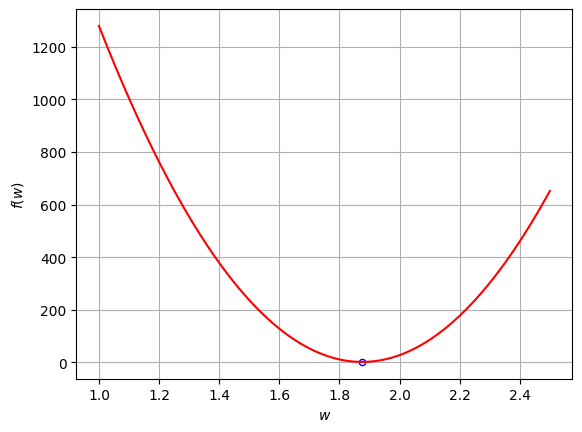

In [181]:
fig, axes = plt.subplots()
axes.plot(wcandidates, errs, color = "red")
axes.scatter(wcandidates[np.argmin(errs)], np.min(errs), c = "white", s = 20, edgecolor = "blue")
axes.set_xlabel("$w$")
axes.set_ylabel("$f(w)$")
axes.grid()
plt.show()

In [108]:
# with such a small learning rate, we'll ultimately end up with a very good estimate for M 
# but the gradient descent process will be incredibly slow
# it'll take a really long time to get to the local minuimum from our bootstrap value for M

In [182]:
# what happens if the learning rate is too large?
# we'll be taking large strides in the gradient descent and the odds are high to end up with a poor approximation of the local minimum!
# here's a demonstration,

# the M we deduced from previous gradient descent was
wcandidates[np.argmin(errs)]

1.8756878439219609

In [183]:
# and the real M was,
M

1.876425

In [184]:
# a really insignificant difference

np.abs(wcandidates[np.argmin(errs)] - M)

0.0007371560780391473

In [194]:
# with larger strides, i.e 0.20

wcandidates = np.arange(start = 1, stop = 2.5, step = 0.25)
errs = np.array([cost_fn(y, _, x) for _ in wcandidates])

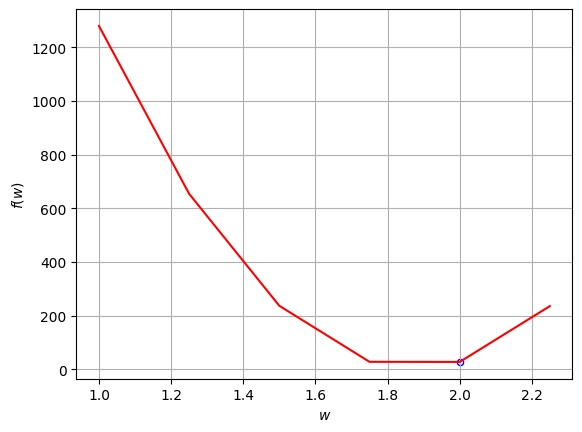

In [195]:
fig, axes = plt.subplots()
axes.plot(wcandidates, errs, color = "red")
axes.scatter(wcandidates[np.argmin(errs)], np.min(errs), c = "white", s = 20, edgecolor = "blue")
axes.set_xlabel("$w$")
axes.set_ylabel("$f(w)$")
axes.grid()
plt.show()

In [196]:
# you can see the conspicuous breaks in the line here, 
# the curve becomes jagged due to the longer jumps

wcandidates[np.argmin(errs)]

2.0

In [197]:
# that's not small!

np.abs(wcandidates[np.argmin(errs)] - M)

0.12357499999999999

In [127]:
# with larger strides, we'll likely step over the local minimum without even recognizing it!
# larger learning rates may result in overshoots and can fail to converge or worse can even diverge!

In [128]:
# for more compex gradient descent algorithms, with multiple parameters
# there may be many local minima and maxima
# what will happen if we have reached a local minimum but there's another even lower local minimum acheivable in the graph?

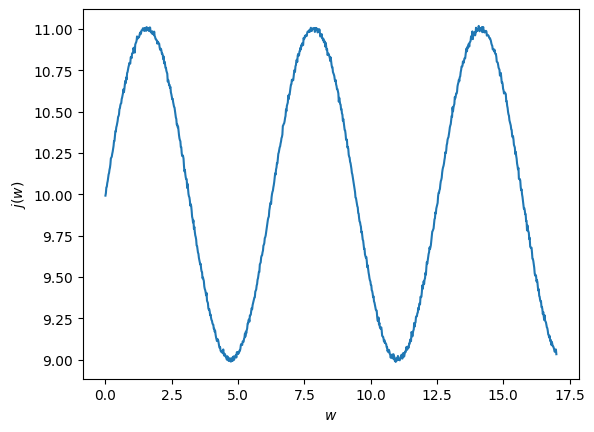

In [176]:
w = np.linspace(0, 17, num = 1000)
jw = np.sin(w) + np.random.normal(loc = 10.0, scale = 0.01, size = w.size)

fig, axes = plt.subplots()
axes.plot(w, jw)
axes.set_xlabel("$w$")
axes.set_ylabel("$j(w)$")
plt.show()

In [159]:
np.isclose(np.sin(w), 0.999999999, atol = 0.0001).sum()

5